# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [ ]:
# YOUR CODE HERE

dataset= pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz", sep='\t')

In [6]:
print(dataset.sample(10))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4711            5.4             0.205         0.16           12.55      0.051   
2129            6.8             0.280         0.39            1.40      0.036   
4168            6.0             0.190         0.26            1.40      0.039   
1250            5.3             0.260         0.23            5.15      0.034   
313             5.7             0.360         0.21            6.70      0.038   
4449            6.4             0.280         0.22           12.80      0.039   
3951            6.3             0.330         0.20           17.90      0.066   
4700            6.8             0.300         0.33           12.80      0.041   
595             6.3             0.270         0.38            0.90      0.051   
1830            7.7             0.440         0.24           11.20      0.031   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4711                 31.0      

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [18]:
# YOUR CODE HERE
print(dataset.columns.tolist())

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'target']


fixed acidity (g(tartaric acid)/dm3): One of the two groups of acidity in wine. Fixed acidity comes primarily from the grapes themselves, and to a lesser extent from fermentation. It is a desirable acidity.

volatile acidity (g(acetic acid)/dm3): The other group of acidity in wine. Volatile acidity is associated with spoilage, there are legal limits which this level may not exceed. It is a result of bad grapes and air in the wine allowing bacterial growth. 

citric acid (g/dm3): One of the primary fixed acids in wine, it originates in the grapes. Typical levels would be 0 to 500 mg/L. 

residual sugar (g/dm3): Sugar from the grapes that is left over after fermentation. This determines how sweet or dry a wine is.

chlorides (g(sodium chloride)/dm3): Higher chloride levels are associated with grapes that have more exposure to NaCl primarily due to proximity to the sea or brackish soil.

free sulfur dioxide (mg/dm3): This is the sulfur dioxide that helps prevent oxidation and spoilage in the wine. It decreases over time due to binding with other chemicals or aeration. 

total sulfur dioxide (mg/dm3): This is the total amount of sulfur dioxide in the wine and is the sum of free sulfur dioxide and bound sulfur dioxide (sulfur dioxide bound to other chemicals). There is a regulated limit for total sulfur dioxide (350 mg/L).

density (g/cm3): The density of the wine serves as an indication of how long it has been fermented. Density decreases during fermentation, if the density is too low it likely means the wine was fermented too long and will not taste as good. 

pH: pH is the measure of acidity in wine. Wines typically range in acidity from 2.5 to 4.5 pH. This gives wine its tart taste. 

sulphates (g(potassium sulphate)/dm3): Sulphates are less commonly discussed in wine, but according to Cortez, they may be related to the fermenting nutrition. 

alcohol (vol.%): The amount of alcohol in wine is dependent on the amount of sugar in the grapes. Wines with higher alcohol content will have a fuller body and bolder taste. 

target: This is a subjective quality metric based on the median rating of at least 3 evaluations from wine experts. It ranges from 0 (worst) to 10 (best). 

Sources:
What's in Wine, UC Davis, https://waterhouse.ucdavis.edu/whats-in-wine
What is Residual Sugar in Wine?, Wine Folly, https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/
The level of sodium and chloride ions in wine, International Organisation of Vine and Wine,
https://www.oiv.int/standards/compendium-of-international-methods-of-wine-and-must-analysis/annex-d/annex-d-advices/level-of-sodium-and-chlorides-ions-in-wines
Total Sulfur Dioxide – Why it Matters, Too!, Iowa State University, https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/
Whine Quality White dataset metadata, https://github.com/EpistasisLab/pmlb/blob/master/datasets/wine_quality_white/metadata.yaml
Understanding Acidity in Wine, Wine Folly, https://winefolly.com/deep-dive/understanding-acidity-in-wine/
Checking the Specific Gravity and Racking, Winemaker's Academy, https://winemakersacademy.com/checking-specific-gravity-racking/
Modeling wine preferences by data mining from physicochemical properties, Cortez, https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub
Understanding the Five Basic Characteristics of Wine, Wine Academy, https://www.wineinvestment.com/learn/insights/understanding-the-five-basic-characteristics-of-wine/

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

[6 5 7 8 4 3 9]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


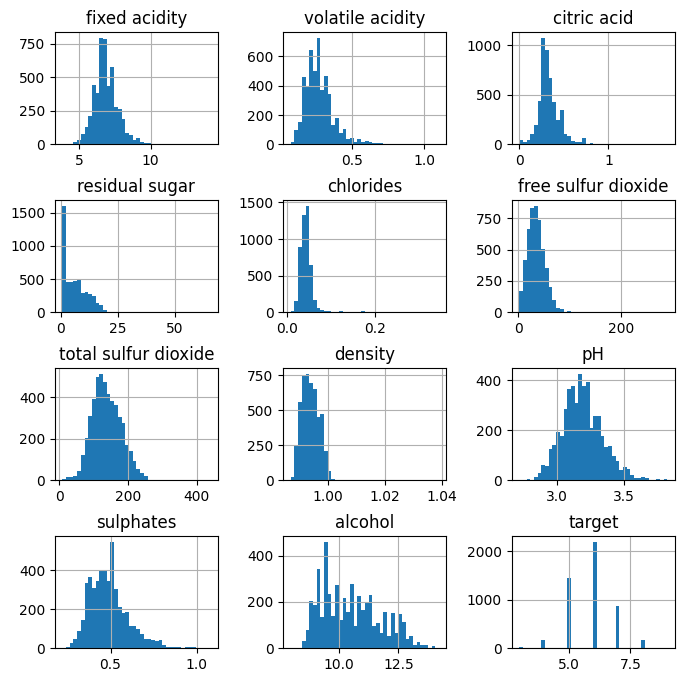

In [22]:
# YOUR CODE HERE

dataset.hist(figsize=(8,8), bins=40)
plt.subplots_adjust(wspace=0.4,hspace=0.5) 
print(dataset['target'].unique())
dataset.describe()

The following columns have approximately normal distributions:
    -Fixed acidity, citric acid, chlorides, total sulfur dioxide, free sulfur dioxide, density, pH, and target

The following columns have right-skewed distributions:
    -volatile acidity, sulphates, and alcohol

The distribution of residual sugar is the least clear. It could be described as half-normal or exponential, but it does not fit either of these descriptions particularly well. It spikes in the first bin near zero and then has almost stepwise decreasing behavior. It is technically right-skewed as well. 

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

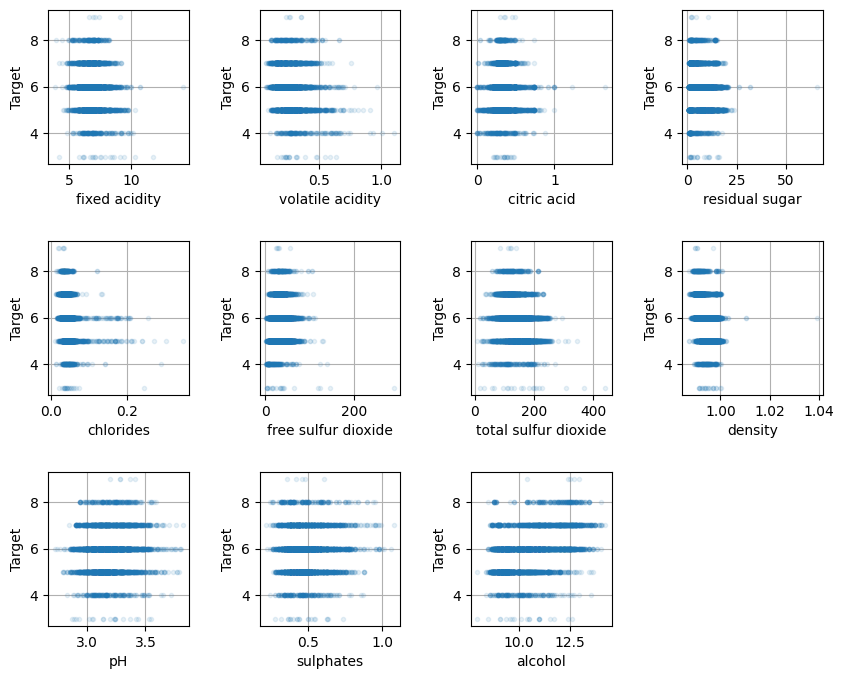

In [47]:
inputs = dataset.copy().drop('target',axis=1)
target = dataset[['target']]
plt.figure(figsize=(10,8))
for (c,i) in enumerate(inputs.columns):
    plt.subplot(3,4,c+1)
    plt.plot(dataset[i], target,'.',alpha=0.1)
    plt.xlabel(i)
    plt.ylabel('Target')
    plt.grid()
plt.subplots_adjust(wspace=0.5,hspace=0.5)

Fixed acidity: There appears to be a loose relationship here with the higher scoring wines having a slightly lower median fixed acidity. This may be a result of limited data. Based on the available data, I would not consider it independent.

Volatile acidity: Similar to fixed acidity, it appears higher scoring wines have slightly lower median volatile acidity. Based on the available data, I would not consider it independent.

Citric acid: I consider the target effectively independent of this feature. The median values appear similar across target ranking, knowing x does not give you information about y.

Residual sugar: I consider the target effectively independent of this feature. The median values appear similar across target ranking, knowing x does not give you information about y.

Chloride: I consider the target effectively independent of this feature. The median values appear similar across target ranking, knowing x does not give you information about y.

Free sulfur dioxide: There appears to be a loose relationship here with the higher scoring wines having a slightly higher median free sulfur dioxide. This may be a result of limited data. Based on the available data, I would not consider it independent.

Total sulfur dioxide: Similar to free sulfur dioxide, it appears higher scoring wines have slightly lower higher total sulfur dioxide. Based on the available data, I would not consider it independent.

Density: There appears to be a loose relationship here with the higher scoring wines having a slightly lower median density. This may be a result of limited data. Based on the available data, I would not consider it independent.

pH: I consider the target effectively independent of this feature. The median values appear similar across target ranking, knowing x does not give you information about y.

Sulphates: I consider the target effectively independent of this feature. The median values do not have a clear trend across target ranking, knowing x does not give you information about y.

Alcohol: The target is not independent of this feature. Higher wine rankings trend toward higher alcohol content. 

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE